In [1]:
# Self Organizing Maps are a one of the Unsupervised Deep Learning models
# In an unsupervised manner, the Self Organizing Map is able to understand which data points are
# close/similar to each other and which are dissimilar to each other and then place them onto a map.

In [3]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from pylab import bone, pcolor, colorbar, plot, show

In [4]:
# Importing the credit card applications dataset (Collected from the UCI Machine Learning Repository)
dataset = pd.read_csv("datasets/applications.csv")

# Splitting the dataset into X and y subsets only to make the distinction in the end between the customers
# who were approved and the customers who were not approved.
# And then training the SOM with only X subset, since we're doing Unsupervised Deep Learning here.
# That means that no dependent variable is considered.
X, y = dataset.iloc[:, :-1].values, dataset.iloc[:, -1].values

In [5]:
dataset

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,15808223,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,15769980,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,15675450,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,15776494,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


In [6]:
X

array([[1.5776156e+07, 1.0000000e+00, 2.2080000e+01, ..., 2.0000000e+00,
        1.0000000e+02, 1.2130000e+03],
       [1.5739548e+07, 0.0000000e+00, 2.2670000e+01, ..., 2.0000000e+00,
        1.6000000e+02, 1.0000000e+00],
       [1.5662854e+07, 0.0000000e+00, 2.9580000e+01, ..., 2.0000000e+00,
        2.8000000e+02, 1.0000000e+00],
       ...,
       [1.5675450e+07, 0.0000000e+00, 1.8830000e+01, ..., 2.0000000e+00,
        1.0000000e+02, 1.0000000e+00],
       [1.5776494e+07, 0.0000000e+00, 2.7420000e+01, ..., 2.0000000e+00,
        1.2000000e+02, 1.2000000e+01],
       [1.5592412e+07, 1.0000000e+00, 4.1000000e+01, ..., 1.0000000e+00,
        5.6000000e+02, 1.0000000e+00]])

In [7]:
y

array([0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,

In [8]:
# Feature Scaling the features for easier model training high dimensional dataset
sc = MinMaxScaler( feature_range = (0, 1) )

# Fitting the feature scaling object to X so that this object gets all the information of subset X
X = sc.fit_transform(X)

In [10]:
X

array([[8.42681467e-01, 1.00000000e+00, 1.25263158e-01, ...,
        5.00000000e-01, 5.00000000e-02, 1.21200000e-02],
       [6.96090562e-01, 0.00000000e+00, 1.34135338e-01, ...,
        5.00000000e-01, 8.00000000e-02, 0.00000000e+00],
       [3.88981656e-01, 0.00000000e+00, 2.38045113e-01, ...,
        5.00000000e-01, 1.40000000e-01, 0.00000000e+00],
       ...,
       [4.39420332e-01, 0.00000000e+00, 7.63909774e-02, ...,
        5.00000000e-01, 5.00000000e-02, 0.00000000e+00],
       [8.44034934e-01, 0.00000000e+00, 2.05563910e-01, ...,
        5.00000000e-01, 6.00000000e-02, 1.10000000e-04],
       [1.06907888e-01, 1.00000000e+00, 4.09774436e-01, ...,
        0.00000000e+00, 2.80000000e-01, 0.00000000e+00]])

In [11]:
# Data Pre-processing Phase complete.

In [12]:
# Importing the MiniSom 1.0 implementation which is the minimalistic implementation of Self Organizing Maps
from minisom import MiniSom

In [14]:
# Training the Self Organizing Map to identify some patterns inside the independent variables contained in X

# Creating a Self Organizing Map object 
som = MiniSom(x = 10, 
              y = 10, 
              input_len = 15, 
              sigma = 1.0, # sigma = radius of the neighborhood
              learning_rate = 0.5
             )

# Initializing the weights
som.random_weights_init(X)

# Training the Self Organizing Map object on matrix of features X
som.train_random(data = X, 
                 num_iteration = 100
                )

In [15]:
# Model Training Phrase complete.

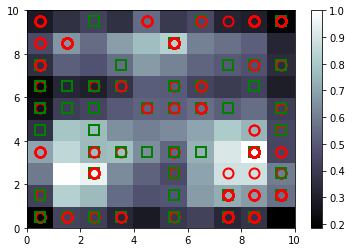

In [16]:
# Now, plotting the Self Organizing Map to identify the outlier neurons inside the map
# We're plotting a 2-dimensional grid that will contain all the final winning nodes 
# and for each of these winning nodes, we will get the MID / Mean Inter-neuron Distance.
# The MID of a specific winning node is the mean of the distances of all the neurons around the winning node inside a neighborhood that we defined.
# The higher the MID, the more the winning node will be far away from its neighbors inside a neighborhood.
# Therefore, the higher the MID, the more the winning node is an outlier.
# Since, in some way, the majority of the winning nodes represent the rules that are respected. 
# and on line, the datapoint that is far from the other neurons and so also far from the general rules.
# This is how we will detect the outliers, that is the potentially fraudulent customers. Because for each neuron we will get the MID,
# we will simply need to take the winning nodes that have the highest MIDs.

# Initializing the window
bone()

# Putting different winning nodes on map
# The map would contain the information about MID for all winning nodes that the self organizing map has identified. 
# We will use colors for MIDs. Different colors corresponding to the different range values of the MIDs.
# We'll use the pcolor function for this. For MIDs, we'll use Distance Map method and transpose the MID matrix
# that is returned by the Distance Map method. 
pcolor(som.distance_map().T)

# Adding the legends for the normalized range of values of MIDs via the colorbar
colorbar()

# Adding some markers to make the distinction between the customers who got approval and the customers who didn't get the approval. 
# Because the customers who cheated and got approval are more relevant targets to fraud detection than the customers who
# didn't get approval and cheated.
# So, we're adding some markers to tell for each winning nodes here, if the customers who are associated to these winning nodes
# got approval or didn't get approval. 
# The red circles correspond to the customers who didn't get approval.
# The green circles correspond to the customers who got approval.
markers, colors = ['o', 's'], ['r', 'g']

# For-looping all over the customers and for each customer, we are going to get the winning node and dependent on
# whether the customer got approval or not, we're coloring this winning node a red circle if the customer didn't get approval
# or a green square if the customer got approval.
# "i" is going to be the different values of all the "indexes" of customers database X. Will take values from 0 to 689.
# "x" is going to be different "vectors" of customers at different iterations.
# "w" == winning node
for i, x in enumerate(X):
    
    # getting winning node of customer X
    w = som.winner(x)
    
    # For the winning node, placing the colored marker on it. Each winning node is represented by a square in the SOM.
    # We'll put the marker at the center of the square. 
    # w[0], w[1] == the two coordinates of the winning node. w[0] = x-coordinate, w[1] = y-coordinate. BUT these are the coordinates of the lower-left corners, NOT the center.
    # So, add 0.5 to both w[0] and w[1] for the center coordinates of the winning node.
    # So the marker will be put on the center of the square corresponding to the winning node.
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)

# Showing the Self Organizing Map plot.
# So, not only do we have the Mean Inter-neuron Distances, but also we got the information on whether the customer got approval or didn't get approval
# for each of the winning nodes. 
# If a winning node shows a green square and low to medium MID, then it doesn't indicate a high risk of fraud.
# Looking at the outliers, we see them as the winning nodes with high MIDs / white color, where the distance is almost 1 or equal to 1.
# which clearly indicates that there is a high risk of fraud for these customers associated to these two winning nodes.
# We see that, we have both cases some customers who got approval and some customers who didn't get approval.
# because we get a green square and also a red circle on the same winning node.
# Now, we need to catch these potential frauds in the winning nodes, but in priority those who got approvals but were not supposed to.
# because it's of course much more relevant to the bank to catch these potential fraudulent customers who got away with this fraud.
show()

In [23]:
# The frauds are identified by outlier winning nodes, because outlier winning nodes are the ones that are far from the general rules. 
# We see all the majority of points here, with dark colors closer to each other, because their MIDs are pretty low.
# So, that means, all the winning nodes in the neighborhood of one winning node are close to this
# winning node at the center and therefore that creates clusters of winning nodes all close to each other.
# But these winning nodes have large MIDs and therefore they're/ the white ones are outliers and accordingly potential frauds.

In [17]:
# Finding potential fraudulent customers using the Self Observing Map.
# To get the explicit list of customers who potentially cheated, we will get the coordinates of these two winning nodes here
# and we will use a function to find the customers associated to these two winning nodes.
# Since we don't have an inverse mapping function to directly get the list of customers from the coordinates of the winning nodes, 
# we'll use a dictionary that we can obtain by using a method available in minisom.py and that will contain all the different mappings
# from the winning nodes to the customers. So, we'll get all the mappings and then we'll use the coordinates of our outlier winning nodes 
# that we identified, the white ones, and that will give us the list of customers. And since we actually identified two outlying winning nodes, 
# we will have to use the concatenate function to concatenate the two list of customers so that we can have a whole list of potential cheaters.

# Obtaining the mappings 
# Returns a dictionary of all the mappings from the winning nodes in SOM to the customers. 
# The key is the coordinates of the winning nodes. And the value is the list of all the customers associated to those winning nodes. 
mappings = som.win_map(X) 

# Obtaining the coordinates of the outlier winning nodes
# the outlier winning nodes are the winning nodes with green squares and high MID / whitish-white colored.
# Concatenating the lists from the winning nodes to get a whole list of potential fraudulent customers who got approved for the credit card
# Coordinates are considered as the ones on the lower-left coordinates of the winning node
# So, outlier winning nodes' coordinates are -  (8, 3), (2, 2)
# the 'axis' is a compulsory argument that specifies whether we want to concatenate vertically or horizontally.
# here, we are concatenating vertically, hence axis = 0. 
# Since we're concatenating the horizontal vectors of customers, we should put the second below the first customer vectors.
# Hence we're concatenating along the vertical axis. But these values are scaled. We need to also inverse the scaling.
frauds = np.concatenate((mappings[(8,3)], mappings[(2,2)]), 
                        axis = 0
                       )

# Using the inverse transform method to obtain the original values from the scaled ones.
frauds = sc.inverse_transform(frauds)

In [18]:
print(mappings.keys())

dict_keys([(8, 1), (8, 3), (9, 1), (3, 0), (0, 6), (3, 3), (9, 9), (0, 3), (5, 3), (6, 3), (7, 0), (5, 1), (2, 3), (8, 9), (2, 0), (9, 7), (5, 8), (9, 2), (0, 0), (0, 8), (0, 7), (1, 0), (5, 2), (5, 6), (7, 1), (8, 7), (5, 0), (1, 8), (8, 0), (3, 6), (0, 1), (0, 9), (9, 4), (2, 5), (2, 2), (4, 5), (9, 3), (0, 5), (2, 6), (4, 3), (9, 5), (8, 4), (6, 5), (0, 4), (6, 9), (4, 9), (2, 4), (7, 2), (6, 6), (7, 7), (1, 6), (8, 6), (5, 5), (2, 9), (8, 2), (7, 9), (7, 5), (1, 5), (3, 7)])


In [19]:
frauds

array([[1.5739548e+07, 0.0000000e+00, 2.2670000e+01, 7.0000000e+00,
        2.0000000e+00, 8.0000000e+00, 4.0000000e+00, 1.6500000e-01,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 1.6000000e+02, 1.0000000e+00],
       [1.5699839e+07, 0.0000000e+00, 2.8170000e+01, 5.8500000e-01,
        2.0000000e+00, 6.0000000e+00, 4.0000000e+00, 4.0000000e-02,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 2.6000000e+02, 1.0050000e+03],
       [1.5648069e+07, 0.0000000e+00, 2.4500000e+01, 1.7500000e+00,
        1.0000000e+00, 8.0000000e+00, 4.0000000e+00, 1.6500000e-01,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 1.3200000e+02, 1.0000000e+00],
       [1.5731586e+07, 0.0000000e+00, 2.9500000e+01, 2.0000000e+00,
        1.0000000e+00, 1.0000000e+01, 8.0000000e+00, 2.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00,

In [22]:
# So we get the customer IDs as the first values of the arrays, 
# which then we can use to identify the potential fraudulent customers.
# We'll then get the values of y for all these customer IDs, take in priority the ones who got approved for the credit cards,
# then investigate deeper to identify whether those potential fraudulent customers really committed the fraud.